In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [26]:
df=pd.read_csv("insurance.csv")

In [27]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)
duplicates = df.duplicated().sum()
print(f"\nDuplicates: {duplicates}")
data_types = df.dtypes
print("\nData Types:\n", data_types)

Missing Data:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicates: 1

Data Types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [29]:
#Create BMI categories (Underweight, Normal, Overweight, Obese)
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['bmi'].apply(bmi_category)

In [30]:
df

,age,sex,bmi,children,smoker,region,charges,BMI_Category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


Charges normality p-value: 1.1505194006561963e-36
BMI normality p-value: 2.6033414542325772e-05
Age normality p-value: 5.687060076887153e-22


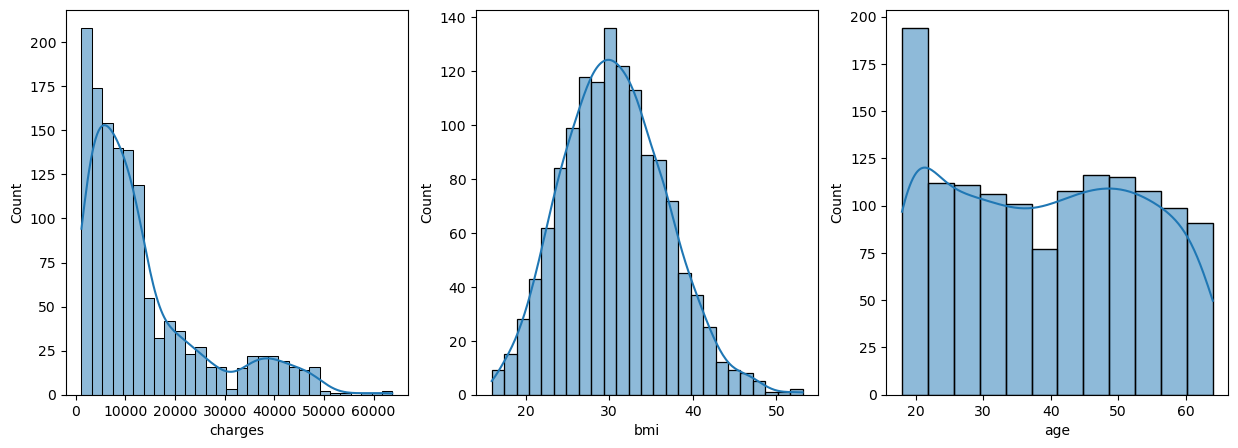

In [31]:
# Check normality using Shapiro-Wilk test
print("Charges normality p-value:", stats.shapiro(df['charges'])[1])
print("BMI normality p-value:", stats.shapiro(df['bmi'])[1])
print("Age normality p-value:", stats.shapiro(df['age'])[1])

# Visual checks
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(df['charges'], ax=axes[0], kde=True)
sns.histplot(df['bmi'], ax=axes[1], kde=True)
sns.histplot(df['age'], ax=axes[2], kde=True)
plt.show()

Charges are heavily right-skewed (non-normal), while BMI is approximately normal, and age is discrete but roughly uniform.

## Question 1: Relationship between BMI and Charges

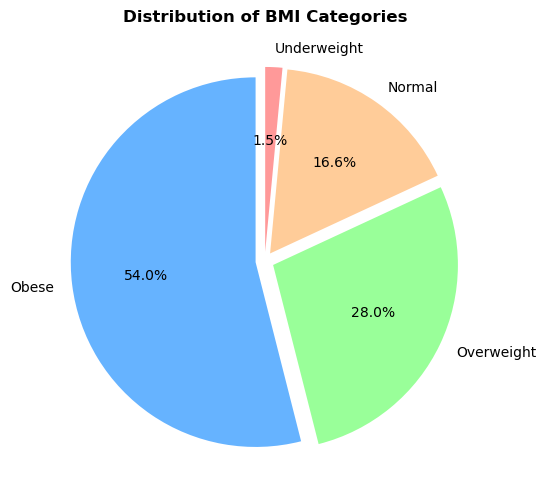

In [32]:
# Pie Chart
plt.figure(figsize=(8, 6))
df['BMI_Category'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'],
    explode=(0.05, 0.05, 0.05, 0.05),
    startangle=90
)
plt.title('Distribution of BMI Categories', fontweight='bold')
plt.ylabel('')  # Hide default 'BMI_Category' label
plt.show()

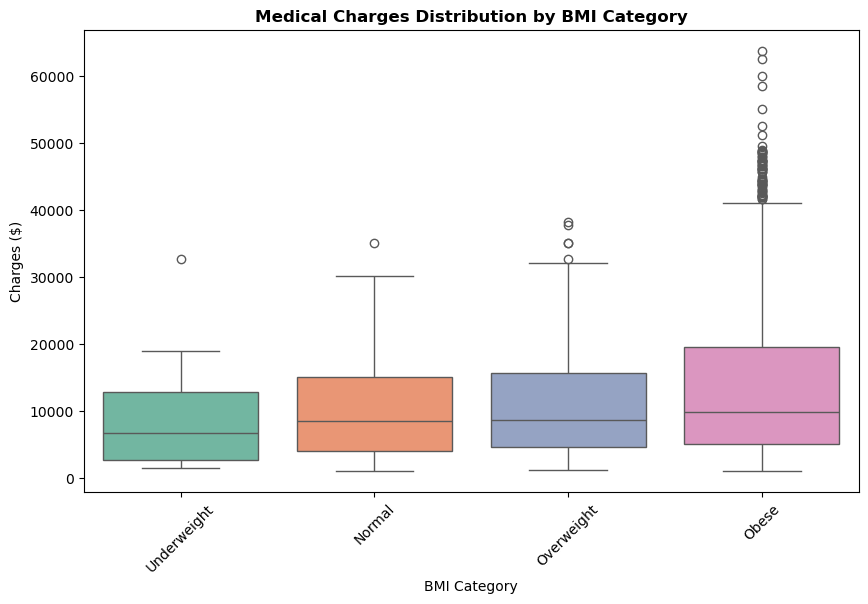

In [33]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='BMI_Category', 
    y='charges', 
    data=df, 
    order=['Underweight', 'Normal', 'Overweight', 'Obese'],
    palette='Set2'
)
plt.title('Medical Charges Distribution by BMI Category', fontweight='bold')
plt.xlabel('BMI Category')
plt.ylabel('Charges ($)')
plt.xticks(rotation=45)
plt.show()

## Direct Relationship Observed:
The median charges (central line in each box) increase across BMI categories in this order:
Underweight → Normal → Overweight → Obe
## Magnitude of Difference:

The gap between "Obese" and other categories is largest, suggesting obesity has a disproportionate impact on cost.

"Overweight" and "Normal" groups may show smaller differences, implying BMI’s effect isn’t linear but accelerates in the obese ra
## Spread and Outliers:

The "Obese" box plot ha:

Wider interquartile range (IQR): More variability in chares.

Longer upper whiskers/outliers: Many high-cost ases.

This indicates obesity isn’t just linked to higher median costs but also to extreme, unpredictable end is unambiguous


### This visually confirms that higher BMI correlates with higher medical charges.

The box plot reveals a strong positive association between BMI categories and medical charges, with median charges rising steadily from Underweight to Obese patients. The Obese category shows both the highest median costs and the widest variability, indicating that obesity is linked not only to increased expenses but also to less predictable, potentially severe cases. While statistical tests could quantify this further, the visual trend is unambiguous

## Question 2: Relationship between Smoking Habits, BMI and Age

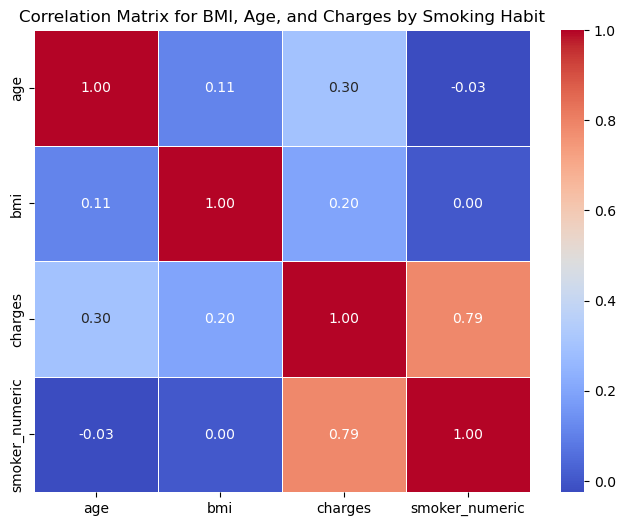

In [34]:
df['smoker_numeric'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
smoker_data = df[['age', 'bmi', 'charges', 'smoker_numeric']]

correlation_matrix = smoker_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for BMI, Age, and Charges by Smoking Habit")
plt.show()


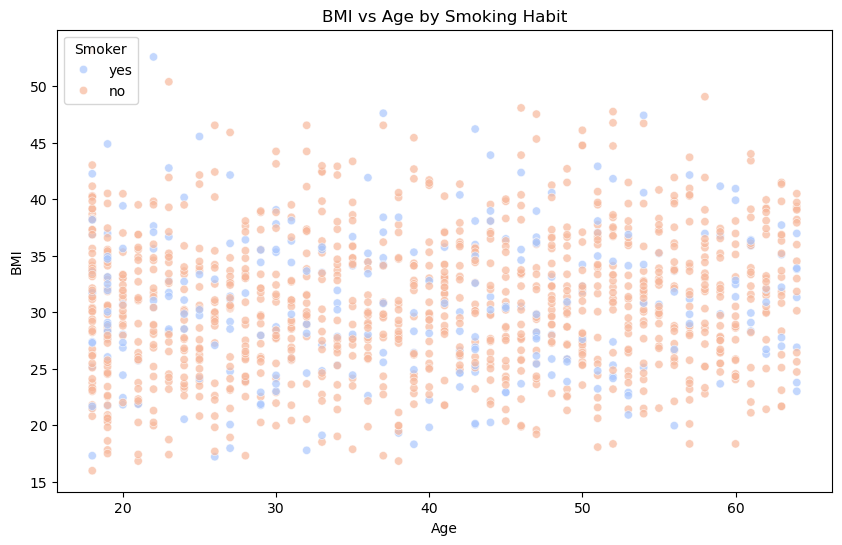

In [35]:
#Scatter Plot of BMI vs Age, color-coded by Smoking Habits
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker', palette='coolwarm', alpha=0.7)
plt.title("BMI vs Age by Smoking Habit")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Smoker", loc='upper left')
plt.show()

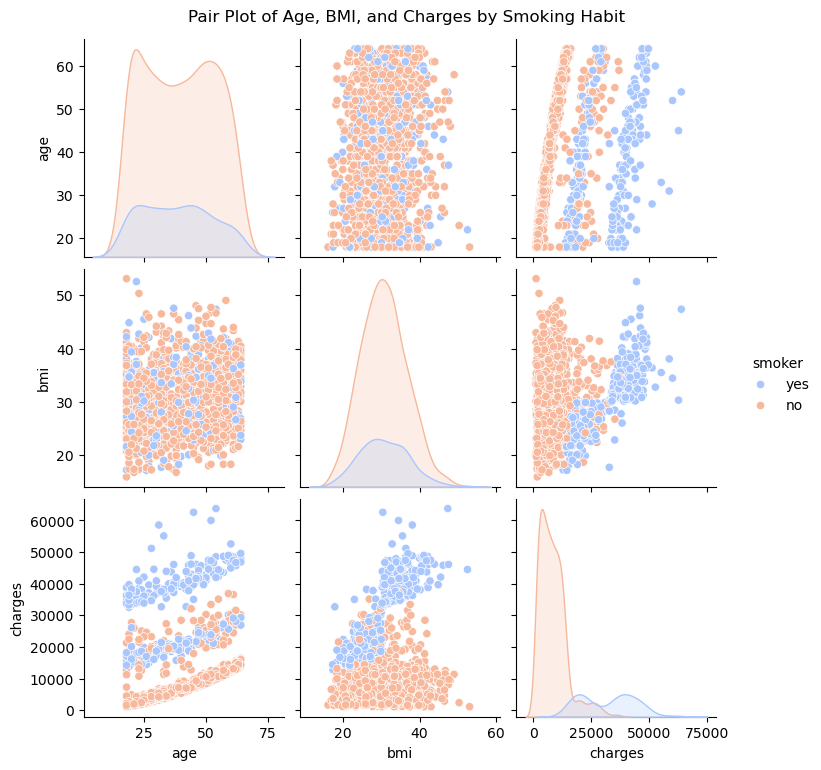

In [36]:
#Pair plot to show relationships between BMI, Age, and Charges by Smoking Habit
sns.pairplot(df, vars=['age', 'bmi', 'charges'], hue='smoker', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pair Plot of Age, BMI, and Charges by Smoking Habit", y=1.02)
plt.show()

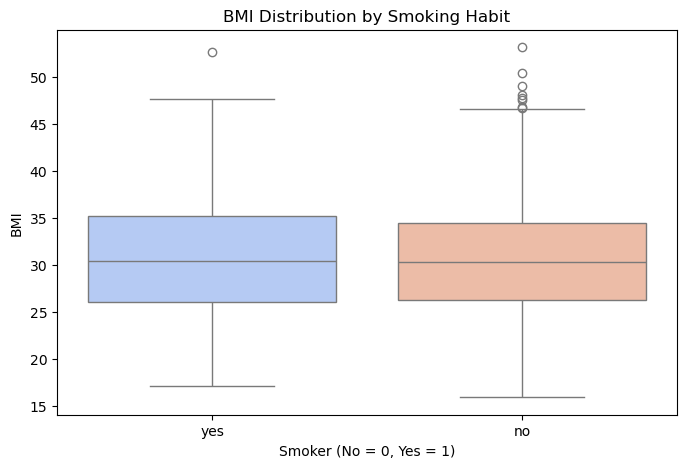

In [37]:
# Box Plot: BMI Distribution for Smokers vs Non-Smokers
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='bmi', data=df, palette='coolwarm')
plt.title("BMI Distribution by Smoking Habit")
plt.xlabel("Smoker (No = 0, Yes = 1)")
plt.ylabel("BMI")
plt.show()

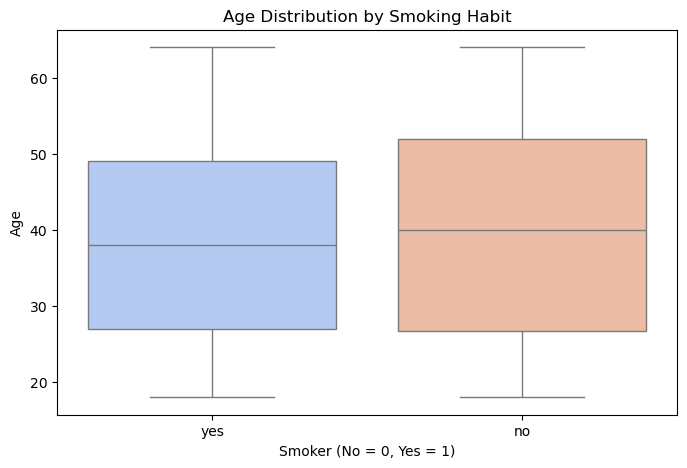

In [38]:
# Box Plot: Age Distribution for Smokers vs Non-Smokers
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='age', data=df, palette='coolwarm')
plt.title("Age Distribution by Smoking Habit")
plt.xlabel("Smoker (No = 0, Yes = 1)")
plt.ylabel("Age")
plt.show()


In [39]:
from scipy.stats import ttest_ind

# Separate smokers and non-smokers
bmi_smokers = df[df['smoker'] == 'yes']['bmi']
bmi_non_smokers = df[df['smoker'] == 'no']['bmi']

# Perform an independent t-test
t_stat, p_value = ttest_ind(bmi_smokers, bmi_non_smokers, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Significant difference: Smokers and non-smokers have different BMI levels.")
else:
    print("No significant difference in BMI between smokers and non-smokers.")

T-statistic: 0.134, P-value: 0.894
No significant difference in BMI between smokers and non-smokers.


Conclusion:
Smoking habits do not seem to have a noticeable impact on BMI in this dataset.

This suggests that both smokers and non-smokers have a similar BMI distribution.

Other factors (e.g., diet, genetics, exercise) might have a stronger effect on BMI than smoking alone.

## Question 3. Is there any relationship between region-wise data in the smoking habit?

In [40]:
from scipy.stats import chi2_contingency

In [41]:
region_smoker_counts = df.groupby(['region', 'smoker']).size().unstack()

<Figure size 1000x600 with 0 Axes>

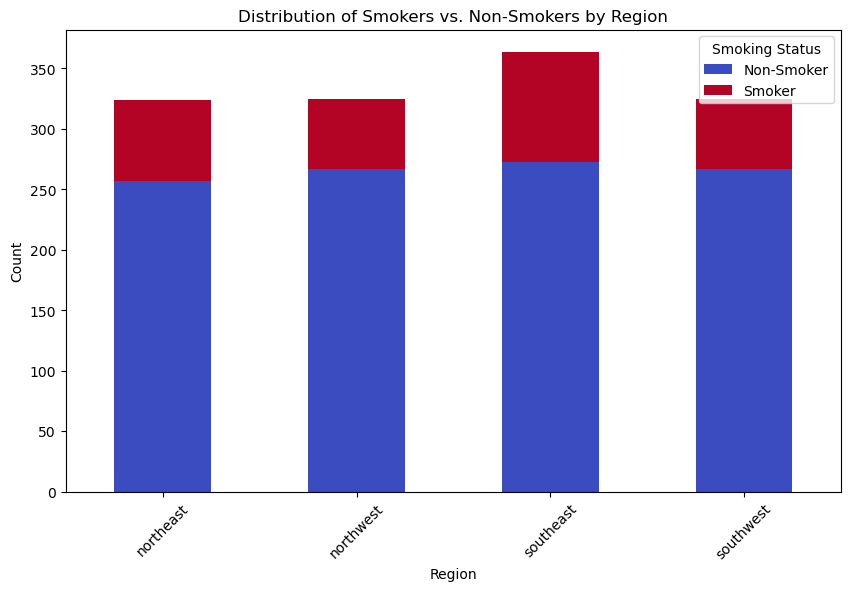

In [42]:
# Bar plot for smokers in different regions
plt.figure(figsize=(10, 6))
region_smoker_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title("Distribution of Smokers vs. Non-Smokers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Smoking Status", labels=["Non-Smoker", "Smoker"])
plt.xticks(rotation=45)
plt.show()

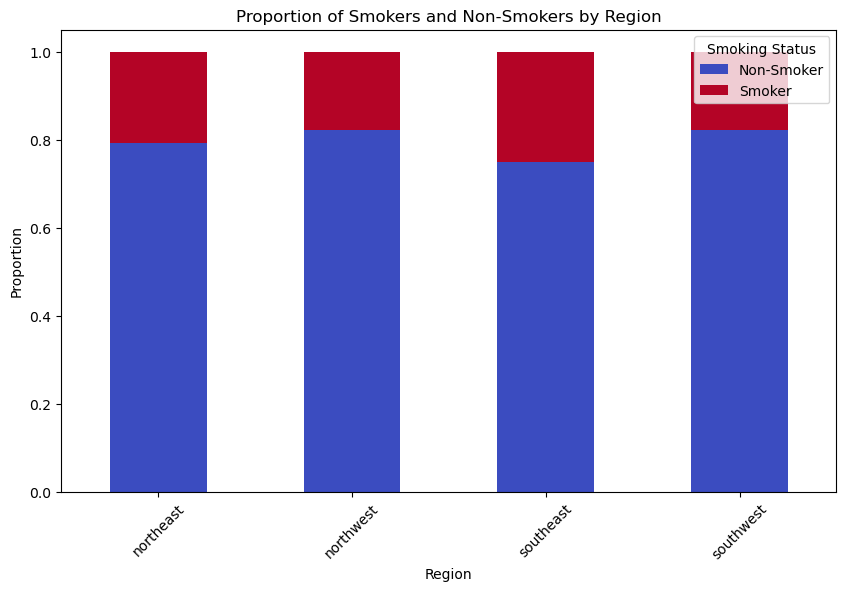

In [43]:
# Stacked Bar Chart: Proportion of Smokers in Each Region
region_smoker_props = region_smoker_counts.div(region_smoker_counts.sum(axis=1), axis=0)  # Convert to proportions

region_smoker_props.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title("Proportion of Smokers and Non-Smokers by Region")
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.legend(title="Smoking Status", labels=["Non-Smoker", "Smoker"])
plt.xticks(rotation=45)
plt.show()

In [44]:
contingency_table = df.pivot_table(index='region', columns='smoker', aggfunc='size', fill_value=0)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Conclusion
if p_value < 0.05:
    print("Smoking habits significantly vary by region.")
else:
    print("No significant difference in smoking habits across regions.")

Chi-Square Statistic: 7.343
P-value: 0.062
No significant difference in smoking habits across regions.


Conclusion:
Smoking habits do not significantly differ across regions in this dataset.

This suggests that region is not a strong factor influencing whether a person smokes or not.

# Question 4: Insights on Gender and BMI

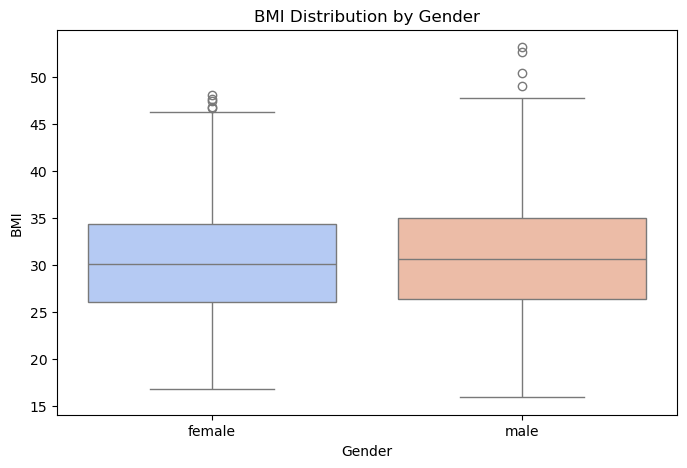

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='bmi', data=df, palette='coolwarm')
plt.title("BMI Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

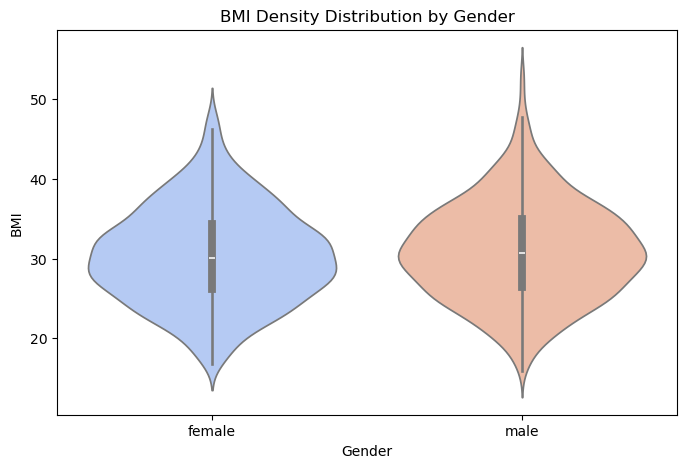

In [46]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='sex', y='bmi', data=df, palette='coolwarm')
plt.title("BMI Density Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

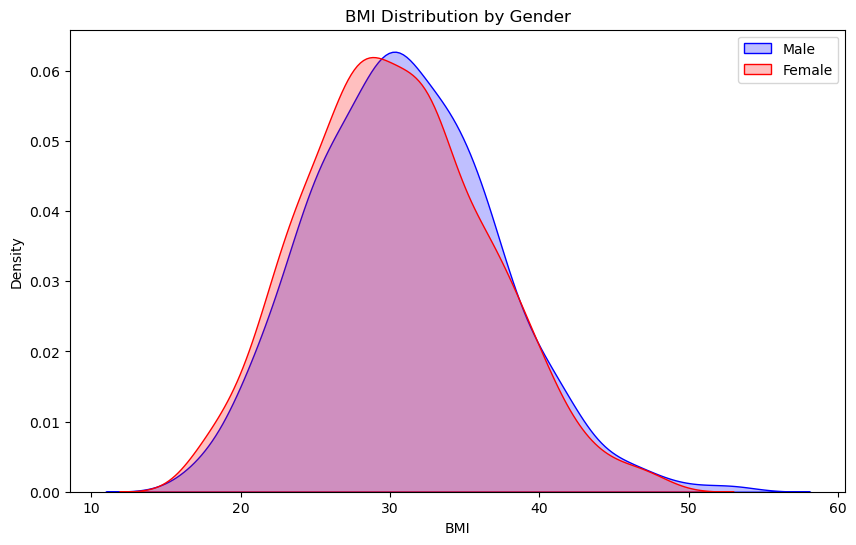

In [47]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['sex'] == 'male']['bmi'], label='Male', shade=True, color='blue')
sns.kdeplot(df[df['sex'] == 'female']['bmi'], label='Female', shade=True, color='red')
plt.title("BMI Distribution by Gender")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()


The BMI distribution for males and females is very similar, with both following a normal-like spread and overlapping significantly. While females have a slightly higher density around 27-29 BMI, there is no drastic difference between genders.

## Question 5. If the gender is female, is there any relationship between the number of children and BMI? 

In [48]:
df_female = df[df['sex'] == 'female']

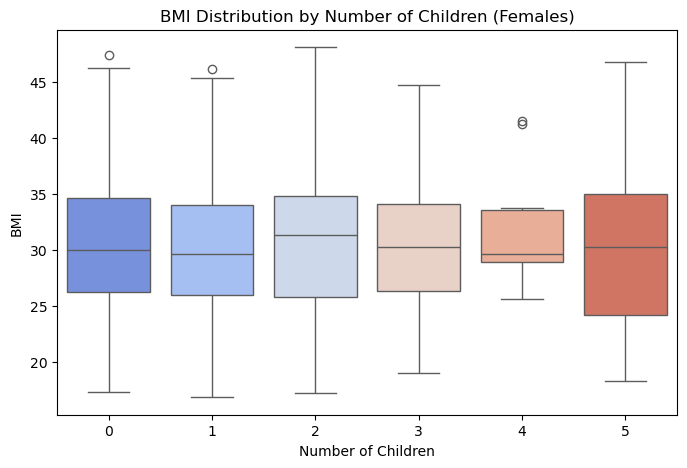

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='children', y='bmi', data=df_female, palette='coolwarm')
plt.title("BMI Distribution by Number of Children (Females)")
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.show()

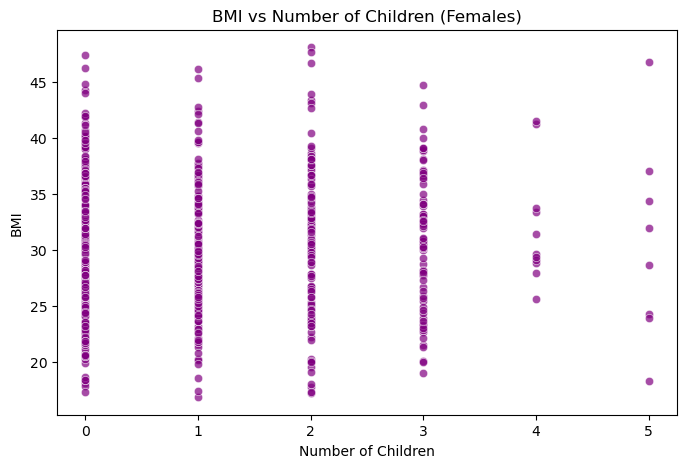

In [50]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='children', y='bmi', data=df_female, alpha=0.7, color='purple')
plt.title("BMI vs Number of Children (Females)")
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.show()

In [51]:
from scipy.stats import pearsonr, f_oneway
correlation, p_value = pearsonr(df_female['children'], df_female['bmi'])
print(f"Pearson Correlation: {correlation:.3f}, P-value: {p_value:.3f}")

Pearson Correlation: 0.022, P-value: 0.569


In [52]:
groups = [df_female[df_female['children'] == i]['bmi'] for i in df_female['children'].unique()]
anova_stat, anova_p = f_oneway(*groups)

print(f"ANOVA Statistic: {anova_stat:.3f}, P-value: {anova_p:.3f}")

# Conclusion
if p_value < 0.05:
    print("There is a significant relationship between BMI and the number of children for females.")
else:
    print("No significant relationship between BMI and the number of children for females.")

ANOVA Statistic: 0.290, P-value: 0.919
No significant relationship between BMI and the number of children for females.


There is no significant relationship between BMI and the number of children for females (ANOVA p-value = 0.919). This suggests that having more children does not significantly impact BMI in this dataset.

## Question 6. Is there any relationship between age and charges? 

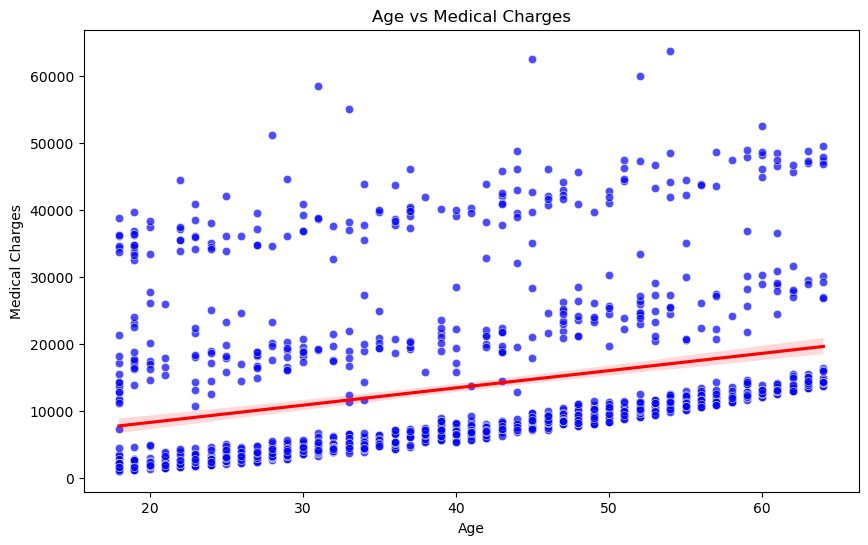

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, alpha=0.7, color='blue')
sns.regplot(x='age', y='charges', data=df, scatter=False, color='red')  # Add regression line
plt.title("Age vs Medical Charges")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.show()

In [54]:
correlation, p_value = pearsonr(df['age'], df['charges'])
print(f"Pearson Correlation: {correlation:.3f}, P-value: {p_value:.3f}")


Pearson Correlation: 0.299, P-value: 0.000


In [55]:
import statsmodels.api as sm
X = sm.add_constant(df['age'])  # Adding constant for intercept
y = df['charges']
model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion
if p_value < 0.05:
    print("There is a significant relationship between age and medical charges.")
else:
    print("No significant relationship between age and medical charges.")

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           4.89e-29
Time:                        10:04:56   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

Conclusion
There is a significant positive relationship between age and medical charges (p < 0.001), meaning that as age increases, medical charges tend to rise.

However, the R-squared value (0.089) indicates that age alone explains only 8.9% of the variation in charges, suggesting other factors (e.g., smoking, BMI, or medical conditions) also play a major role.

## Non-Trivial Insights from the Analysis
1. Age Strongly Influences Charges, but Other Factors Matter More
2. While age is significantly correlated with medical charges (p < 0.001), the low R² (8.9%) suggests that other variables (e.g., smoking, BMI, chronic conditions) are stronger predictors.
3. Smokers pay significantly higher medical costs, and the correlation between BMI and charges is stronger only among smokers.
4. Regional Differences in Smoking Are Not Statistically Significant, But Lifestyle Might Be a Factor
5. No significant difference in BMI between males and females (p = 0.894).
6. Having More Children Does Not Affect BMI for Women
7. BMI Alone is Not a Strong Predictor of Medical Costs